In [1]:
import pandas as pd
import numpy as np 
import pandas_profiling

In [2]:
df0 = pd.read_csv('/home/kevin/Documents/uni/EPFL/master_thesis/dimensionality/metal_channels_results_1.csv')
df1 = pd.read_csv('/home/kevin/Documents/uni/EPFL/master_thesis/dimensionality/metal_channels_results_2.csv')
df2 = pd.read_csv('/home/kevin/Documents/uni/EPFL/master_thesis/dimensionality/metal_channels_results_3.csv')
df3 = pd.read_csv('/home/kevin/Documents/uni/EPFL/master_thesis/dimensionality/metal_channels_results.csv')

In [3]:
pd_merged = pd.concat([df0, df1, df2, df3])

In [4]:
pd_merged.head()

,0-norm,10-norm,2-norm,3-norm,5-norm,7-norm,MagpieData avg_dev AtomicWeight,MagpieData avg_dev Column,MagpieData avg_dev CovalentRadius,MagpieData avg_dev Electronegativity,...,pages,photo_regex_result,planes,remarks,title,unbound,url,uv_regex_result,vpa,year
0,5,0.491412,0.593646,0.526686,0.497617,0.492664,5.337417,5.474915,17.580794,0.320000,...,1961-1970,[],"['xz', 'xy', 'yz']",NaN,"Synthesis, structural characterization and ani...",False,http://pubs.rsc.org/en/content/articlepdf/2012...,[],10.903698,NaN
1,6,0.380438,0.514335,0.431875,0.391831,0.383293,7.178709,5.309085,17.087005,0.398526,...,6129-6131,[],"['xz', 'xy', 'yz', 'xx', 'yy', 'zz']",NaN,Novel Heterometallic 3d−4f Metal−Azido Complex...,True,http://pubs.acs.org/doi/pdf/10.1021/ic060773+,[],11.694984,NaN
2,5,0.317801,0.501910,0.405829,0.348159,0.329261,6.870152,5.989796,18.647959,0.423750,...,61104-61113,True,"['xz', 'xy', 'yz']",NaN,"Syntheses, supramolecular structures, magnetic...",True,http://pubs.rsc.org/en/content/articlepdf/2014...,[],9.970020,NaN
3,8,0.519551,0.594462,0.543182,0.523261,0.520207,27.983039,6.299207,26.291486,0.628395,...,45-48,[],"['xz', 'xy', 'yz', 'xx', 'yy', 'zz']",NaN,Weakley sandwich-type anion in organic–inorgan...,True,https://api.elsevier.com/content/article/PII:S...,[],12.453021,NaN
4,7,0.345622,0.509554,0.425076,0.374040,0.356559,7.232057,5.869599,19.962963,0.409877,...,3805-3814,[],"['xz', 'xy', 'yz', 'xx', 'yy', 'zz']",NaN,1D Magnetic Interactions in CuII Oxovanadium P...,False,http://pubs.acs.org/doi/pdf/10.1021/ic503045d,[],10.135303,NaN


In [30]:
pd_merged.drop_duplicates(inplace=True)
pd_merged.dropna(subset=['formula'], inplace=True)

In [139]:
pd_merged['doi_paper'].dropna().to_list()

['10.1039/c1dt11179e',
 '10.1021/ic060773+',
 '10.1039/C4RA09951F',
 '10.1016/j.inoche.2012.12.005',
 '10.1021/ic503045d',
 '10.1021/ja106142x',
 '10.1002/ejic.201500204',
 '10.1039/b200213b',
 '10.1021/ic902091p',
 '10.1016/S0277-5387(02)00845-8',
 '10.1039/C4CE02019G',
 '10.1016/j.molcata.2015.03.019',
 '10.1039/c1ce05391d',
 '10.1080/00958972.2014.892592',
 '10.1039/b819096h',
 '10.1021/cg0496282',
 '10.1016/j.inoche.2013.09.021',
 '10.1039/b205278b',
 '10.1002/ejic.201402740',
 '10.1039/C3CC42741B',
 '10.1016/j.inoche.2014.01.012',
 '10.1039/C3CE41356J',
 '10.1002/anie.201506345',
 '10.1002/ejic.201403077',
 '10.1039/c2ce25214g',
 '10.1021/ic00039a029',
 '10.1002/chem.200500321',
 '10.1016/j.inoche.2017.01.026',
 '10.1016/j.inoche.2013.09.069',
 '10.1006/jssc.1996.0110',
 '10.1016/j.ica.2012.10.023',
 '10.1039/b822934c',
 '10.1016/j.jssc.2013.05.029',
 '10.1016/j.ica.2008.06.032',
 '10.1002/ejic.201000298',
 '10.1021/cm503570f',
 '10.1021/acs.inorgchem.5b02188',
 '10.1021/ic0006908

In [32]:
from crossref.restful import Works
works = Works()

In [ ]:
UV VIS Absorption spectroscopy photometer absorbance

In [63]:
query_res = works.doi('10.1039/b822934c')['URL']

In [64]:
query_res

'http://dx.doi.org/10.1039/b822934c'

In [56]:
from pyscopus import Scopus
scopus = Scopus('97d9d219e9efce0823123c557ec179a9')

In [61]:
scopus.search('10.1039/b822934c')

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,65349196188,Mechanochemical conversion of a metal oxide in...,CrystEngComm,14668033,None,14668033,11,743-745,2009-05-05,10.1039/b822934c,124,"[{'name': 'University of Cambridge', 'city': '...",Journal,Article,"[26032019900, 7006295629]",None


In [135]:
bool_filter_white = (pd_merged['formula'].str.contains('Zn').values | 
                     pd_merged['formula'].str.contains('Ti').values |
                     pd_merged['formula'].str.contains('Zr').values |
                     pd_merged['formula'].str.contains('Cd').values)

bool_filter_black = ~(pd_merged['formula'].str.contains('Co').values |
                    pd_merged['formula'].str.contains('Cu').values |
                     pd_merged['formula'].str.contains('Ru').values )


bool_filter_clashing = pd_merged['clashing'] == False
bool_filter_unbound = pd_merged['unbound'] == False
bool_filter_hydrogens = pd_merged['hydrogens'] == True
bool_filter_disorder = ~pd_merged['disorder_csd'].isna()

bool_filter = (bool_filter_white & bool_filter_black 
               & bool_filter_clashing & bool_filter_unbound 
               & bool_filter_hydrogens & bool_filter_disorder)

len(pd_merged[bool_filter]['doi_paper'])

144

In [104]:
~bool_filter_black * bool_filter_white

array([False, False, False, ..., False,  True, False])

In [109]:
bool_filter

array([False, False, False, ..., False, False, False])

In [66]:
pd_merged.to_pickle('metal_channels_in_ccsd.pickle')

In [6]:
pandas_profiling.ProfileReport(pd_merged)

Number of variables,188
Number of observations,5173
Total Missing (%),3.8%
Total size in memory,7.3 MiB
Average record size in memory,1.4 KiB
Numeric,82
Categorical,21
Boolean,6
Date,0
Text (Unique),2
Rejected,77


In [16]:
df_uv_regex_true = pd_merged[pd_merged['uv_regex_result'] == 'True']

In [17]:
df_uv_regex_false = pd_merged[pd_merged['uv_regex_result'] == 'False']

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/kevin/anaconda3/envs/cof_project/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


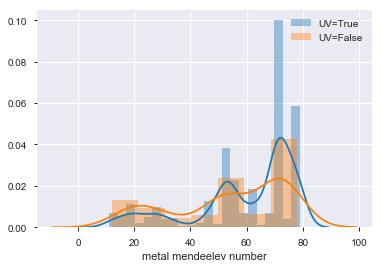

In [43]:
sns.distplot(df_uv_regex_false['metal_mendeelev_number'], label='UV=True')
sns.distplot(df_uv_regex_true['metal_mendeelev_number'], label='UV=False')
plt.xlabel('metal mendeelev number')
plt.legend()

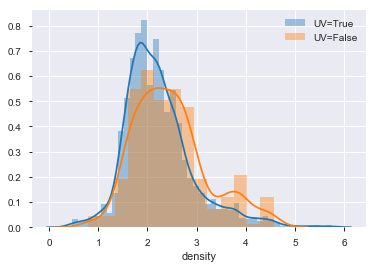

In [42]:
sns.distplot(df_uv_regex_false['density'], label='UV=True')
sns.distplot(df_uv_regex_true['density'], label='UV=False')
plt.xlabel('density')
plt.legend()

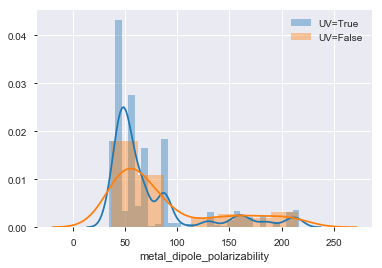

In [44]:
sns.distplot(df_uv_regex_false['metal_dipole_polarizability'], label='UV=True',)
sns.distplot(df_uv_regex_true['metal_dipole_polarizability'], label='UV=False',)
plt.xlabel('metal_dipole_polarizability')
plt.legend()

/home/kevin/anaconda3/envs/cof_project/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


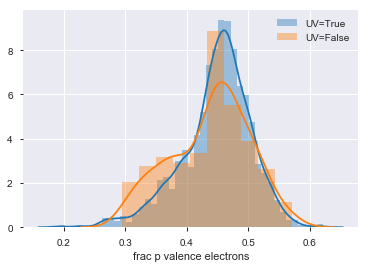

In [45]:
sns.distplot(df_uv_regex_false['frac p valence electrons'], label='UV=True')
sns.distplot(df_uv_regex_true['frac p valence electrons'], label='UV=False')
plt.xlabel('frac p valence electrons')
plt.legend()

/home/kevin/anaconda3/envs/cof_project/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


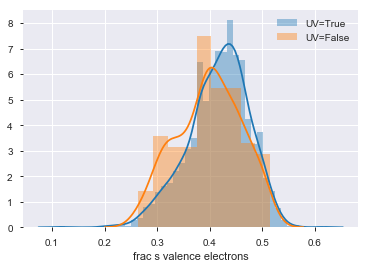

In [46]:
sns.distplot(df_uv_regex_false['frac s valence electrons'], label='UV=True')
sns.distplot(df_uv_regex_true['frac s valence electrons'], label='UV=False')
plt.xlabel('frac s valence electrons')
plt.legend()

/home/kevin/anaconda3/envs/cof_project/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


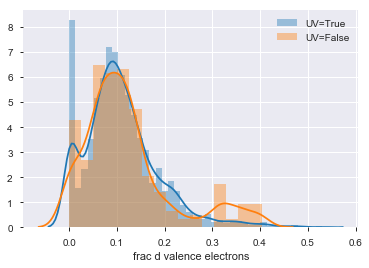

In [47]:
sns.distplot(df_uv_regex_false['frac d valence electrons'], label='UV=True')
sns.distplot(df_uv_regex_true['frac d valence electrons'], label='UV=False')
plt.xlabel('frac d valence electrons')
plt.legend()

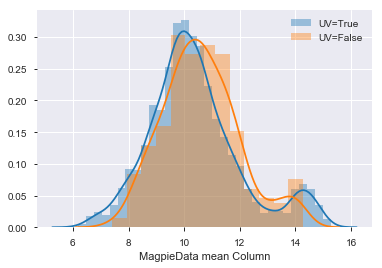

In [54]:
sns.distplot(df_uv_regex_false['MagpieData mean Column'], label='UV=True')
sns.distplot(df_uv_regex_true['MagpieData mean Column'], label='UV=False')
plt.xlabel('MagpieData mean Column')
plt.legend()

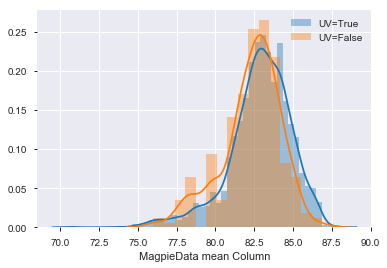

In [58]:
sns.distplot(df_uv_regex_false['MagpieData mean MendeleevNumber'], label='UV=True')
sns.distplot(df_uv_regex_true['MagpieData mean MendeleevNumber'], label='UV=False')
plt.xlabel('MagpieData mean Column')
plt.legend()